In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#%matplotlib widget

* The cost function takes the prediction $\hat{y}$ and compares it to the target $y$ by taking $1/2m\sum_{i=1}^m  (\hat{y} - y)^2 = 1/2m\sum_{i=1}^m  (f(x^i) - y^i)^2$.

* bash gradient descent is looking at the entire batch of training examples at each update.

In [2]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum += cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])
w = 100
b = 100
compute_cost(x_train, y_train, w, b)

15933.333333333332

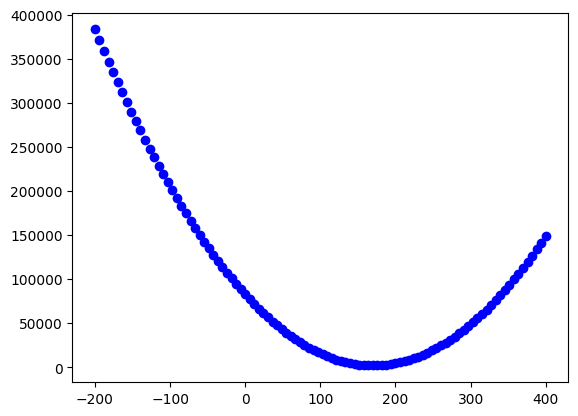

In [5]:
def compute_linear_cost_optimized(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)
    total_cost = cost / (2 * m)

    return total_cost
w = np.linspace(-200, 400, 100)
plt.figure()
for w_i in w:
    plt.plot(w_i, compute_linear_cost_optimized(x_train, y_train, w_i, b), 'bo')
#compute_cost_optimized(x_train, y_train, w, b)

In [6]:
def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c='b', label="Our Prediction")
    ax.legend()


def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color='red', ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color='red',
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color='red')


def plt_intuition(x_train, y_train):

    w_range = np.array([200-200,200+200])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_linear_cost_optimized(x_train, y_train, tmp_w, tmp_b)

    @interact(w=(*w_range,10),continuous_update=False)
    def func( w=150):
        f_wb = np.dot(x_train, w) + tmp_b

        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
        fig.canvas.toolbar_position = 'bottom'

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

        ax[1].plot(w_array, cost)
        cur_cost = compute_linear_cost_optimized(x_train, y_train, w, tmp_b)
        ax[1].scatter(w,cur_cost, s=100, color='k', zorder= 10, label= f"cost at w={w}")
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color='red', ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color='red', ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 100)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')
        fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
        plt.show()

In [7]:
#%pip install ipywidgets --upgrade
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [8]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = x.shape[0]

    f_wb = w * x + b
    dj_dw = np.sum((f_wb - y) * x) / m
    dj_db = np.sum(f_wb - y) / m

    return dj_dw, dj_db


def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_linear_cost_optimized, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_linear_cost_optimized(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% np.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing


# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_linear_cost_optimized, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00
